#Number Plate Recognition System
#Group F
#E/17/212
#E/17/219
#E/17/284

##Preconfigurations

In [ ]:
#importing libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import matplotlib.image as pltimg

# #imporot the patch for the google colab
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#specifying the folder in the google drive for test cases
folder_name = "/content/drive/MyDrive/CO543-Image Processing/Project/Test Cases/"

In [ ]:
#what is inside the test cases folder
!ls "/content/drive/MyDrive/CO543-Image Processing/Project/Test Cases/"

A1.PNG	B1.PNG	C1.PNG	D1.PNG	E1.PNG	F1.PNG	G1.PNG	H1.PNG
A2.PNG	B2.PNG	C2.PNG	D2.PNG	E2.PNG	F2.PNG	G2.PNG	H2.PNG
A3.PNG	B3.PNG	C3.PNG	D3.PNG	E3.PNG	F3.PNG	G3.PNG	H3.PNG


In [ ]:
#what is inside the test cases folder
test_cases = os.listdir(folder_name)
all_images = []
F_images = []
for test_case in test_cases:
  number , _ = test_case.split(".")
  if number[0] == "F":
    F_images.append(test_case)

  all_images.append(test_case)

print(F_images)
print(all_images)

['F1.PNG', 'F2.PNG', 'F3.PNG']
['A1.PNG', 'A2.PNG', 'A3.PNG', 'B1.PNG', 'B2.PNG', 'B3.PNG', 'C1.PNG', 'C2.PNG', 'C3.PNG', 'D1.PNG', 'D2.PNG', 'D3.PNG', 'E1.PNG', 'E2.PNG', 'E3.PNG', 'F1.PNG', 'F2.PNG', 'F3.PNG', 'G1.PNG', 'G2.PNG', 'G3.PNG', 'H1.PNG', 'H2.PNG', 'H3.PNG']


In [ ]:
#number of test cases
len(all_images)

24

##Image Observation and Aqusition

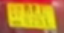

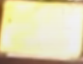

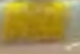

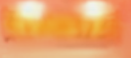

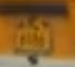

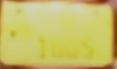

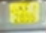

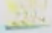

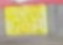

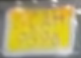

In [ ]:
#plot test images
for test_case in range(len(all_images)):
  img = cv.imread(folder_name+"/"+all_images[test_case])
  cv2_imshow(img)

There are some images which are relavent to our group. Below those are shown.

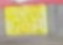

In [ ]:
#plot all the F images
for test_case in range(len(F_images)):
  img = cv.imread(folder_name+"/"+F_images[test_case])
  cv2_imshow(img)

##1.Convert the images into grey scaled images

In [ ]:
#get all the images in F images
fimg_0 = cv.imread(folder_name+"/"+F_images[0])
fimg_1 = cv.imread(folder_name+"/"+F_images[1])
fimg_2 = cv.imread(folder_name+"/"+F_images[2])

In [ ]:
#converting the images to grey scaled images
img = cv.cvtColor(fimg_0, cv.COLOR_BGR2GRAY)
img1 = cv.cvtColor(fimg_1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(fimg_2, cv.COLOR_BGR2GRAY)

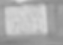

In [ ]:
#showing the images
cv2_imshow(img)
cv2_imshow(img1)
cv2_imshow(img2)

There are some improvments in the first and the third images but the second image definitely could use more improvements.

##2.Apply the histogram equalization to the images

In [ ]:
#perfroming histogram equalization to the image
equImg = cv.equalizeHist(img)
equImg1 = cv.equalizeHist(img1)
equImg2 = cv.equalizeHist(img2)

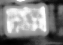

In [ ]:
#showing the images
cv2_imshow(equImg)
cv2_imshow(equImg1)
cv2_imshow(equImg2)

##3.Apply the Transformations to the images

###Log transformation

In [ ]:
# Apply log transformation method
def log(img):

  # Apply log transformation method
  c = 255 / np.log(1 + np.max(img))
  log_image = c * (np.log(img + 1))
    
  # Specify the data type so that
  # float value will be converted to int
  log_image = np.array(log_image, dtype = np.uint8)

  return log_image

In [ ]:
logImg = log(equImg)
logImg1 = log(equImg1)
logImg2 = log(equImg2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


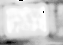

In [ ]:
#showing the images
cv2_imshow(logImg)
cv2_imshow(logImg1)
cv2_imshow(logImg2)

###Power transformation

In [ ]:
# Trying 4 gamma values.
for gamma in [0.2, 0.5 ,4,6]:
      
    # Apply gamma correction.
    gamma_corrected = np.array(255*(equImg / 255) ** gamma, dtype = 'uint8')
  
    # View edited images.
    cv2_imshow(gamma_corrected)

We need to figure out the best method transformation to apply first. Lets do some experiments.

### Log Transfromation -> Power Transformation

In [ ]:
# Trying 4 gamma values.
for gamma in [0.2, 0.5 ,4,6]:

    print("gamma =",gamma)  

    #lets get the log transformation output
    logImg = log(equImg2)
    cv2_imshow(logImg)

    # Apply gamma correction.
    gamma_corrected = np.array(255*(logImg / 255) ** gamma, dtype = 'uint8')
  
    # View edited images.
    cv2_imshow(gamma_corrected)

gamma = 0.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


gamma = 0.5


gamma = 4


gamma = 6


### Power Transfromation -> Log Transformation

In [ ]:
#lets apply power transformation to it
# Trying 4 gamma values.
for gamma in [0.2, 0.5 ,4,6]:

    print("gamma =",gamma)  
    # Apply gamma correction.
    gamma_corrected = np.array(255*(equImg2 / 255) ** gamma, dtype = 'uint8')
  
    # View edited images.
    cv2_imshow(gamma_corrected)

    #view log image
    logImg = log(gamma_corrected)
    cv2_imshow(logImg)

gamma = 0.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


gamma = 0.5


gamma = 4


gamma = 6


It seems like applying the power transformation with the gamma value of 4 is produce the most enhanced image. We can compare the new results with the previous step output now.

In [ ]:
def power_log(img,gamma=4):
  gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
  logImg = log(gamma_corrected)
  return logImg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


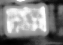

In [ ]:
cv2_imshow(equImg)
logPowImg = power_log(equImg,5) 
cv2_imshow(logPowImg)

cv2_imshow(equImg1)
logPowImg1 = power_log(equImg1,5) 
cv2_imshow(logPowImg)

cv2_imshow(equImg2)
logPowImg2 = power_log(equImg2,5) 
cv2_imshow(logPowImg)

We can see that readability is improved.

##4.Apply filters to improve the image quality further more

We need to enhance the image to detect edges more efficiently so we will use Sobel filter for that. Lets apply Laplace filter and Sobel filter for each image and see the results.

###Laplace Filter

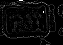

In [ ]:
laplacian = cv.Laplacian(logPowImg,cv.CV_64F)
cv2_imshow(laplacian)
laplacian1 = cv.Laplacian(logPowImg1,cv.CV_64F)
cv2_imshow(laplacian1)
laplacian2 = cv.Laplacian(logPowImg2,cv.CV_64F)
cv2_imshow(laplacian2)

Image is not readable after applying edge detection filter to the image. Lets add Sobel Filter and try.

###Sobel Filter

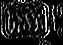

In [ ]:
sobelImg = cv.Sobel(laplacian,cv.CV_64F,1,0,ksize=3)
cv2_imshow(sobelImg)
sobelImg1 = cv.Sobel(laplacian1,cv.CV_64F,1,0,ksize=3)
cv2_imshow(sobelImg1)
sobelImg2 = cv.Sobel(laplacian2,cv.CV_64F,1,0,ksize=3)
cv2_imshow(sobelImg2)

Sobel is added to the image and the image is not readable now. The reason for this is that the images do not show enough information to grab edge information.